# Iris Dataset
![Iris flowers](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Produced by the biologist Robert Fisher in the 1930's, the Iris flower dataset is widely recognised as the best known dataset to be found in the pattern recognition literature. <br>The dataset consists of three species of the Iris flower
 - Iris setosa
 - Iris virginica
 - Iris versicolor

The Iris data contains 50 samples of each of these three species and it measures their sepal length, sepal width, petal length and petal width.

## Imports

In [1]:
#Importing numpy for use with dataset
import numpy as np

#Importing pandas and seaborn for data visualization
import pandas as pd
import seaborn as sb

#Importing matplotlib for use with graphs
import matplotlib.pyplot as plot

import warnings

#Importing the iris data set from the iris.csv file
dataset = pd.read_csv("data/iris.csv")

#Ignoring deprecated warnings
warnings.filterwarnings('ignore')

## Viewing the Data

We are first going to take a look at the data that is within the iris dataset.<br> Using the head() function we can view the first 20 records in the dataset, which allows us to see how it is present within.  

In [2]:
#Viewing the first 20 records within the data set
dataset.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
5,5.4,3.9,1.7,0.4,setosa,1
6,4.6,3.4,1.4,0.3,setosa,1
7,5.0,3.4,1.5,0.2,setosa,1
8,4.4,2.9,1.4,0.2,setosa,1
9,4.9,3.1,1.5,0.1,setosa,1


The use of the info() function allows us to gain some insight on the dataset as a whole. Here we can see that there are 150 total records consisting of 6 different columns. We can see there are 4 columns containing floats, 1 containing an object and 1 containing an int. <br>We can also see how much memory is in usage.

In [3]:
#Here we gain info on the data set
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
species_id      150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


Below we can see that there are clearly 50 records for each of the three species

In [4]:
dataset['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

## Visualizing the Data

Here we are using the pairplot function, to view the data as a series of graphs. This data set becomes alot more meaningful when it is visualized in such a way. We can better understand the relationship between the three different species.<br> Simply looking at data which is in text form without any visual aid can lead the data to be somewhat incomprehensible to the user overall. 

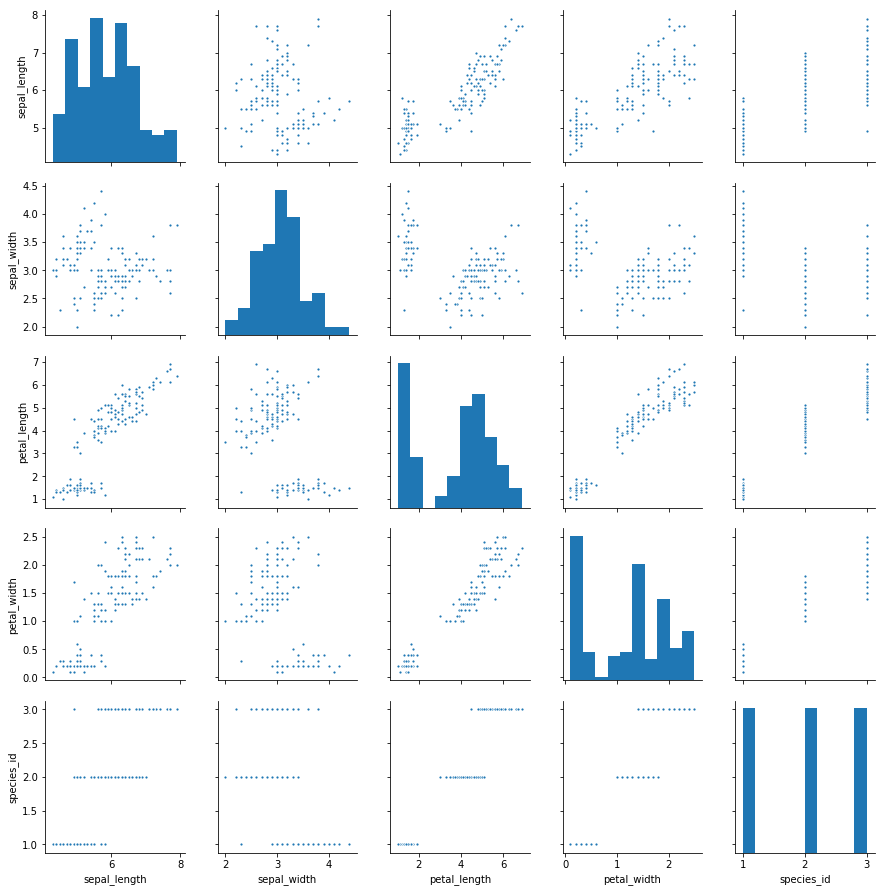

In [17]:
#This pairplot function initially used the "hue='species'" parameter to give more meaning to the graphs.
#However downgrading to python caused a error which was only fixable by removing the hue parameter which was quite annoying.
graphs = sb.pairplot(dataset ,markers='.')

Below we are making use of a violin plot to visualize the data, which is like a box plot. The difference being that the violin plot will show you the probabilty density of the data at seperate values.

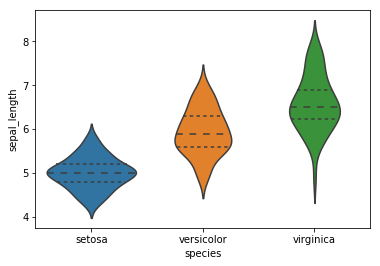

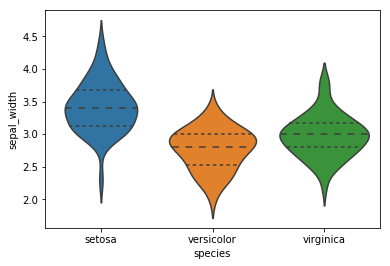

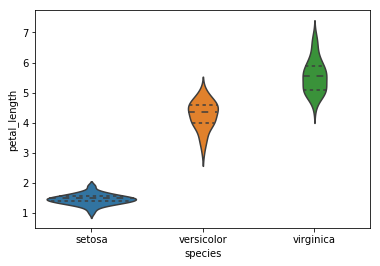

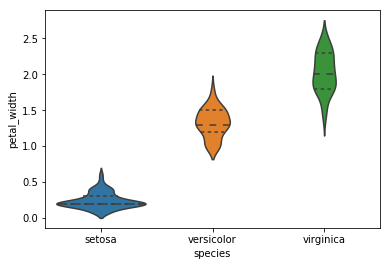

In [6]:
graph = sb.violinplot(x='species', y='sepal_length', data=dataset, inner='quartile')
plot.show()
graph = sb.violinplot(x='species', y='sepal_width', data=dataset, inner='quartile')
plot.show()
graph = sb.violinplot(x='species', y='petal_length', data=dataset, inner='quartile')
plot.show()
graph = sb.violinplot(x='species', y='petal_width', data=dataset, inner='quartile') 
plot.show()

Upon visualizing this data it appears that the setosa species of the iris flower is the most distinct of the three, with the versicolor and virginica species being more closly related. <br>However the latter species are still clearly distinguishable.

## K-Nearest Neighbours (KNN) classifcation model

KNN is used widely in industry for classification problems. It is one of the simplest classification algorithims out there, but it provides us with competitive results nonetheless. Classification is about taking samples of labeled data, and using those samples to predict the class of unlabeled data.

## Imports

In [7]:
#Importing the sub-package neighbors from sklearn package
import sklearn.neighbors as nb

#Importing pandas as pd
import pandas as pd

## Load the Data

In [8]:
#Importing the iris data set from the iris.csv file
dataset = pd.read_csv("data/iris.csv")

We assign our inputs and outputs so we that we can use that to train our classifier on the iris dataset.

In [9]:
inputs = dataset[['sepal_length','sepal_width','petal_length','petal_width']]
outputs = dataset['species']

## Instantiate the Model

The KNeighborsClassifier is a class in python. The function below creates a data structure which represents the KNN algorithim where K is set to 5 in this case. It will select its 5 nearest neighbours. So if we give a point and 4 out of 5 of its nearest neighbors are a versicolor.<br> The algorithm will decide that that species is a versicolor.

In [10]:
knn = nb.KNeighborsClassifier(n_neighbors=5)

We must first train the classifier on the dataset. We give the knn.fit() function the inputs for which we know the outputs, and also those outputs.<br> The function will use these data points to build the model for what the species looks like, so that we can in turn make predictions for future specimens.

In [11]:
knn.fit(inputs, outputs)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Using the loc function we can access a group of values using a label (In this case 10).
<br>Here can clearly see the sepal_length, sepal_width, petal_length, petal_width and species of that object.
<br>We can use this to prove that the KNN algorithm is working correctly in prediction.

In [12]:
#Accessing a group of values using labels
dataset.loc[10]

sepal_length       5.4
sepal_width        3.7
petal_length       1.5
petal_width        0.2
species         setosa
species_id           1
Name: 10, dtype: object

## Predict

In [13]:
#As you can see the KNN algorithm has predicted correctly
knn.predict([[5.4,3.7,1.5,0.2]])

array(['setosa'], dtype=object)

Above we can see that the algorithm is working correctly as it has predicted that the above is a setosa. We know that those values are infact of a setosa as we have checked that using the loc function.
<br>Lets make a few more predictions.

In [14]:
knn.predict([[6,3,1,1]])

array(['setosa'], dtype=object)

In [15]:
knn.predict([[5,2,4,1]]) 

array(['versicolor'], dtype=object)

In [16]:
knn.predict([[6,3,6,3]])

array(['virginica'], dtype=object)